# <center>CELL PHONE PRICE PRIDICTION
   

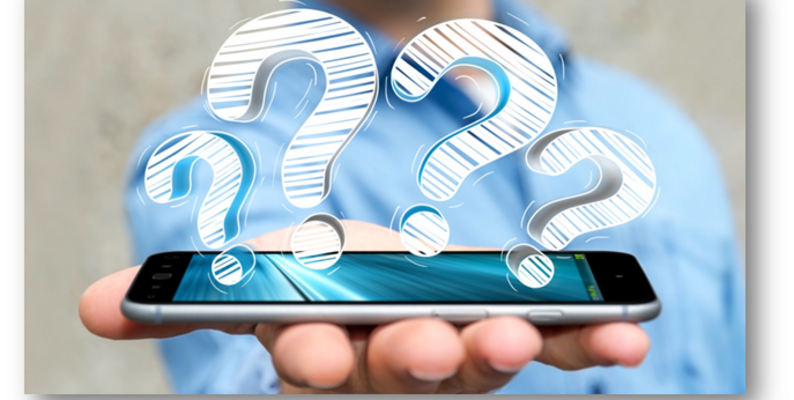

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import  DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import LinearSVR

In [2]:
data=pd.read_csv("Cellphone.csv")
data.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
data.shape

(161, 14)

In [5]:
data.describe()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,675.559006,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,410.851583,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,10.000000,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,237.000000,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,774.000000,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,1026.000000,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,1339.000000,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [6]:
data = data.dropna()

In [7]:
data.isnull().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [8]:
data.duplicated().sum()

0

# <i><center>Univariate analysis


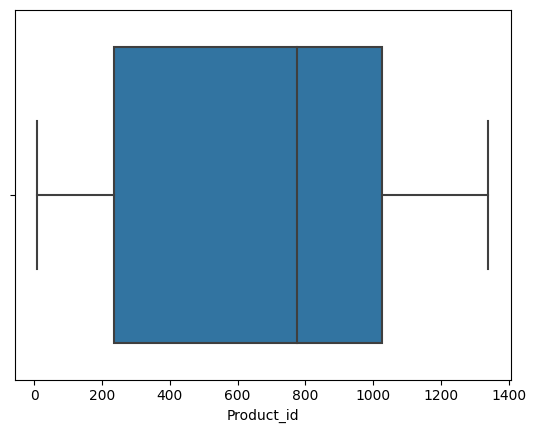

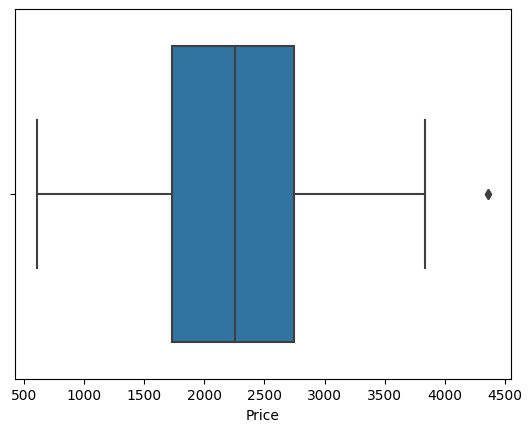

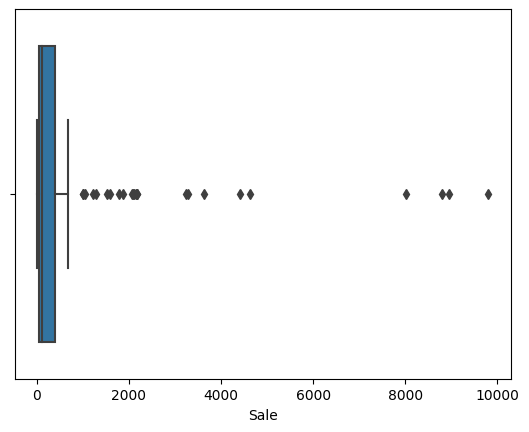

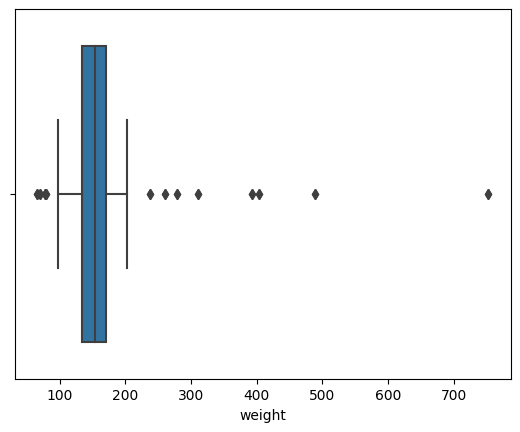

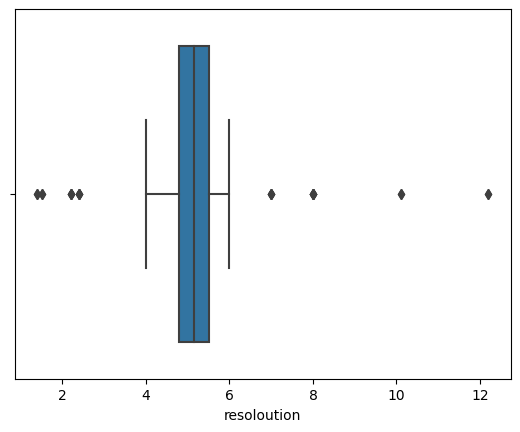

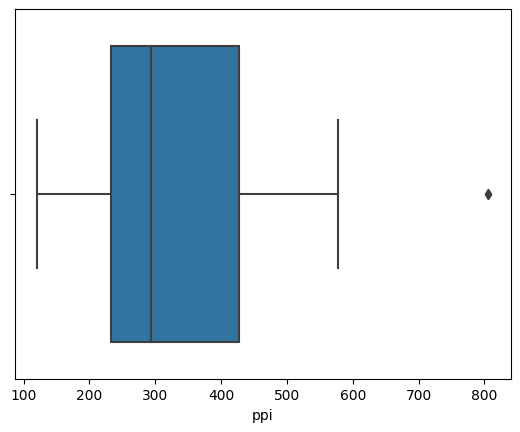

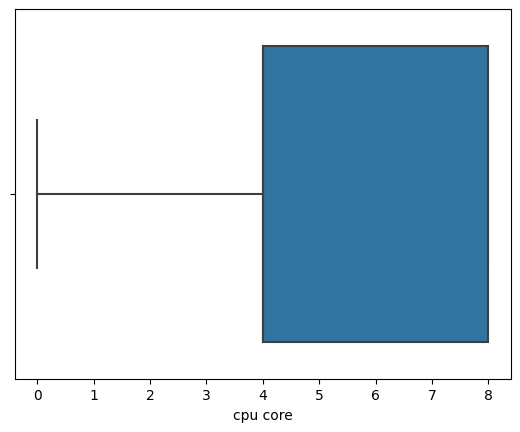

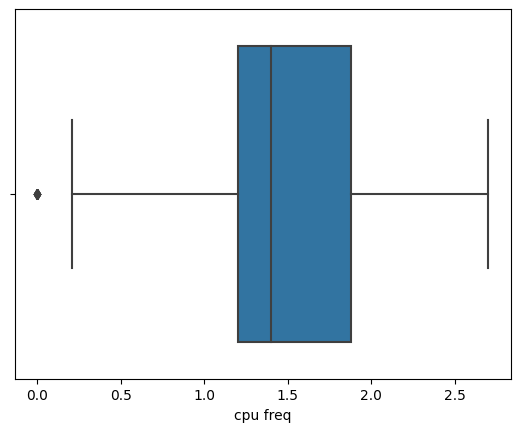

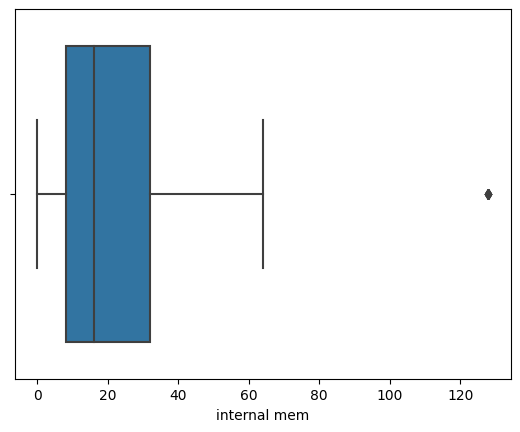

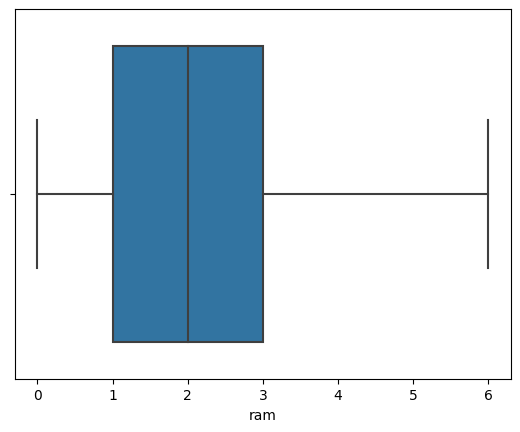

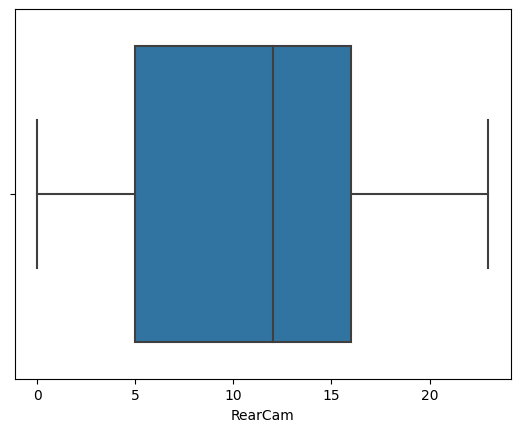

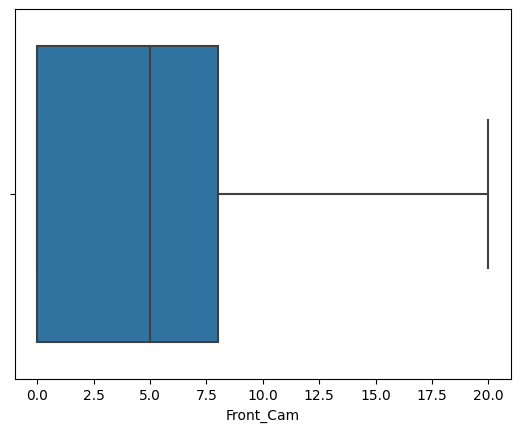

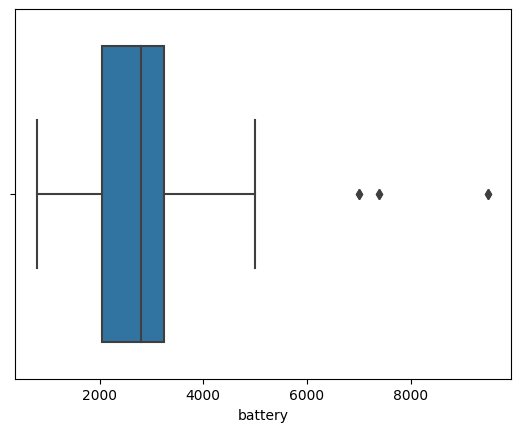

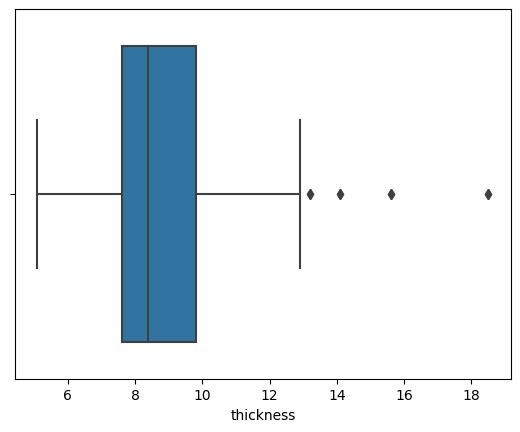

In [9]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.boxplot(x=data[i])
        plt.show()

### Multi variate analysis

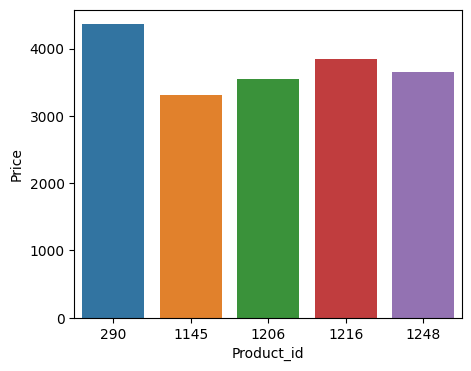

In [10]:
 plt.figure(figsize=(5,4))
sns.barplot(x='Product_id', y ='Price', data=data.sort_values(by='Price',ascending=False)[:10]);


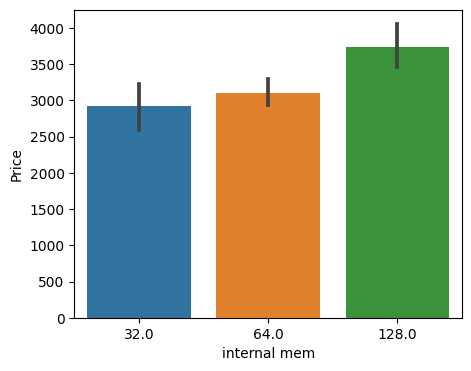

In [11]:
plt.figure(figsize=(5,4))
sns.barplot(x='internal mem', y ='Price', data=data.sort_values(by='internal mem',ascending=False)[:25]);

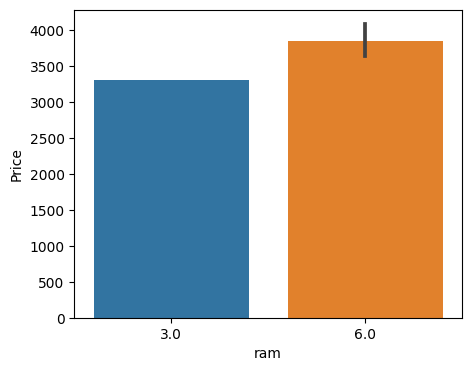

In [12]:
plt.figure(figsize=(5,4))
sns.barplot(x='ram', y ='Price', data=data.sort_values(by='Price',ascending=False)[:10]);


## Scatter plot

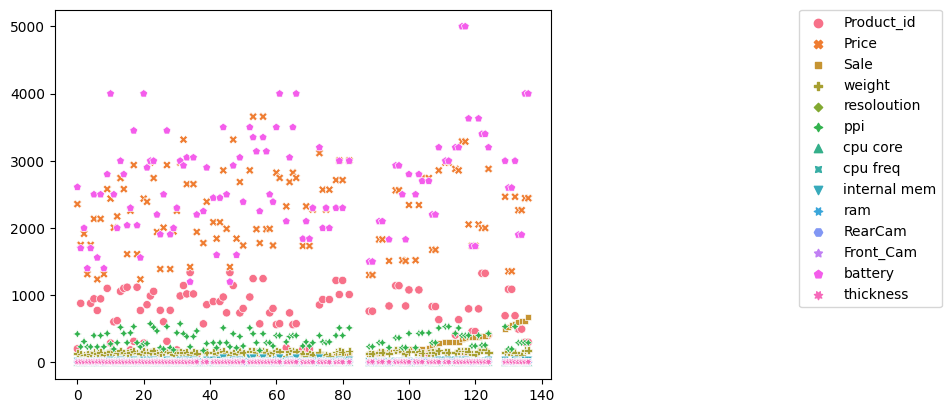

In [51]:
sns.scatterplot(data=data);
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


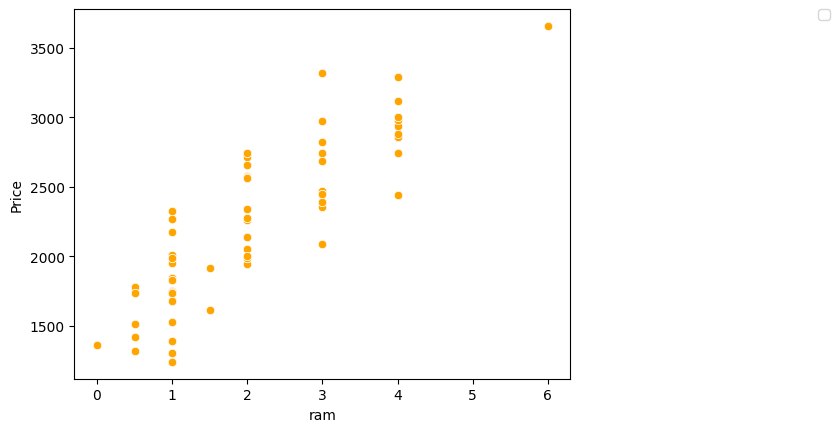

In [57]:
sns.scatterplot(x=data['ram'],y=data['Price'],color='orange');
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


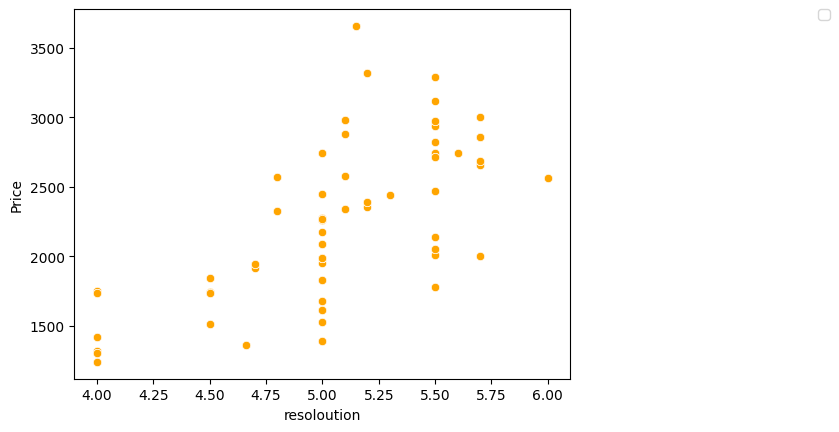

In [65]:
sns.scatterplot(x=data['resoloution'],y=data['Price'],color='orange')
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0);

## <i>Lineplot

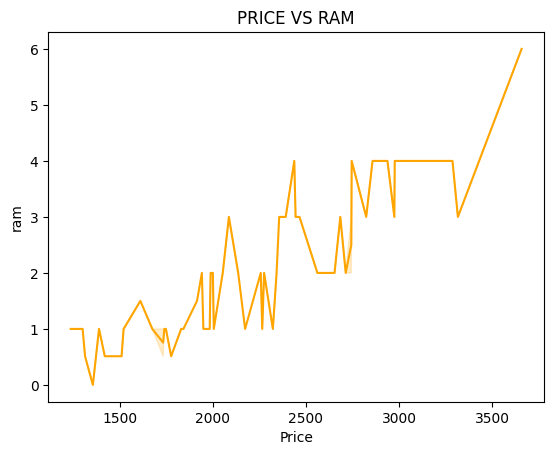

In [44]:
sns.lineplot('Price','ram',data=data,color='ORANGE')
plt.title('PRICE VS RAM')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


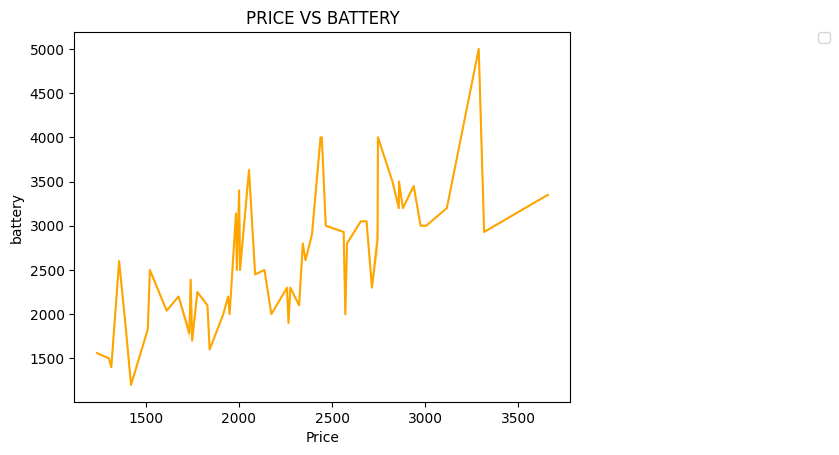

In [43]:
sns.lineplot('Price','battery',data=data,color='ORANGE')
plt.legend(bbox_to_anchor=(1.5,1),loc='upper left',borderaxespad=0);
plt.title('PRICE VS BATTERY')
plt.show()

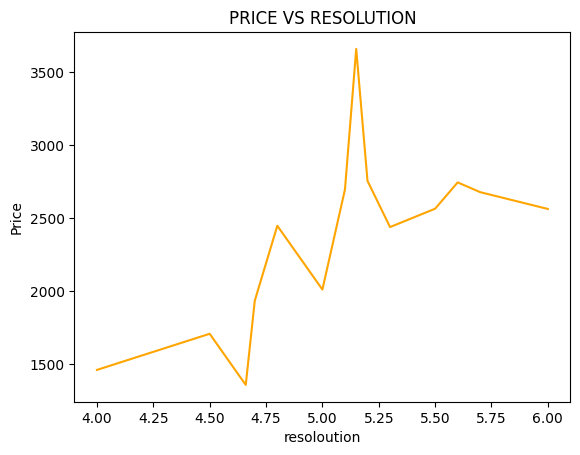

In [42]:
sns.lineplot('resoloution','Price' ,data=data,color='ORANGE',ci=None)
plt.title('PRICE VS RESOLUTION')
plt.show()

## Pie chart

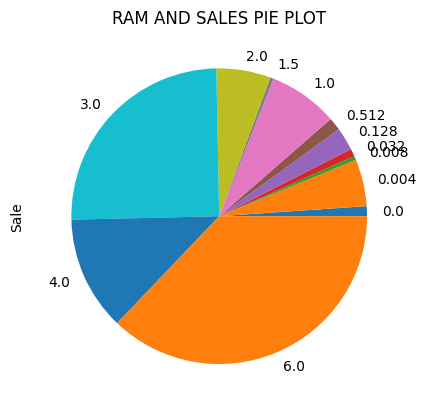

In [19]:
myexplode=[0,0.1]
ram_sale= data.groupby(['ram'])['Sale'].sum()
ram_sale.plot.pie().set(title="RAM AND SALES PIE PLOT");

# OUTLIER TREATMENT

In [20]:
def outlier_limit(col):
    Q3,Q1 = np.nanpercentile(col,[75,25])
    IQR = Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*IQR
    return UL,LL

In [21]:
for column in data.columns:
    if data[column].dtype !="object":
        UL,LL = outlier_limit(data[column])
        data[column] = np.where((data[column]>UL)| (data[column]<LL),np.nan,data[column])

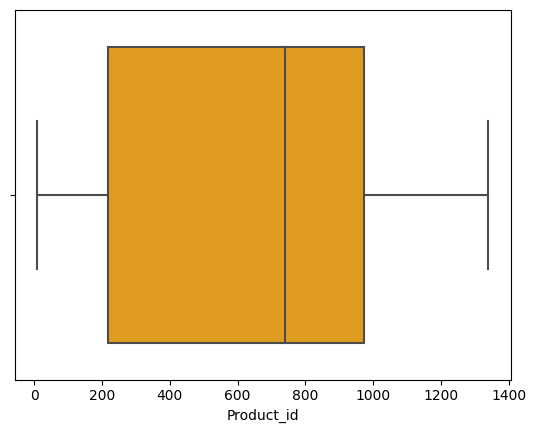

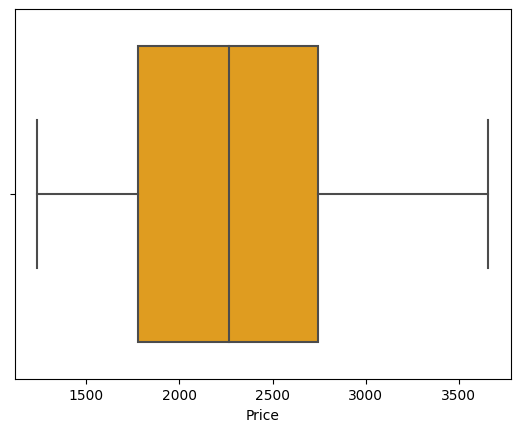

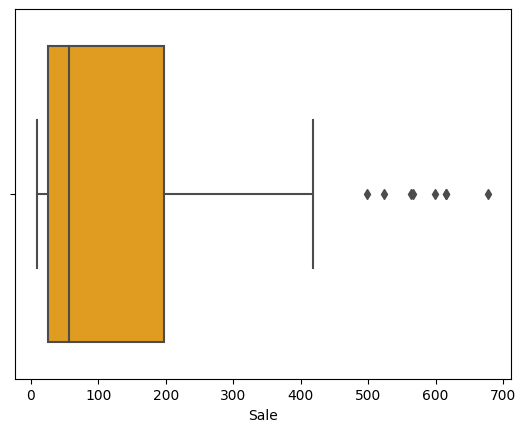

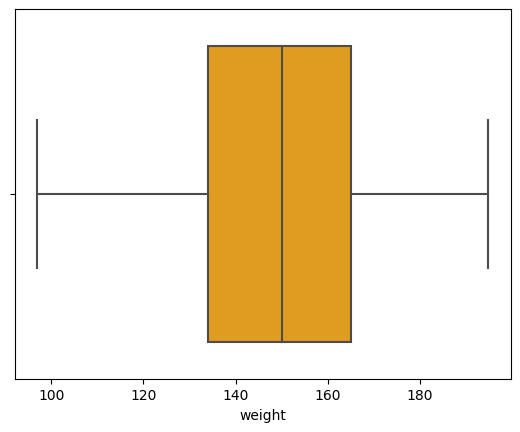

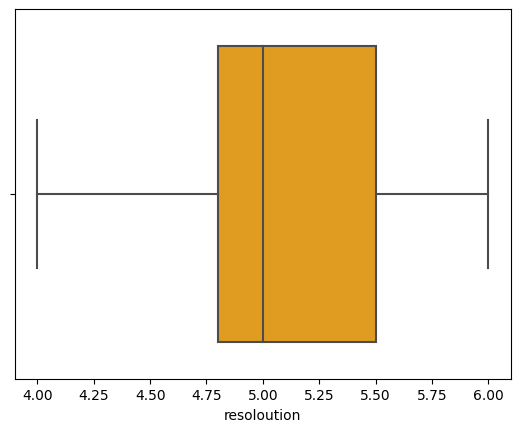

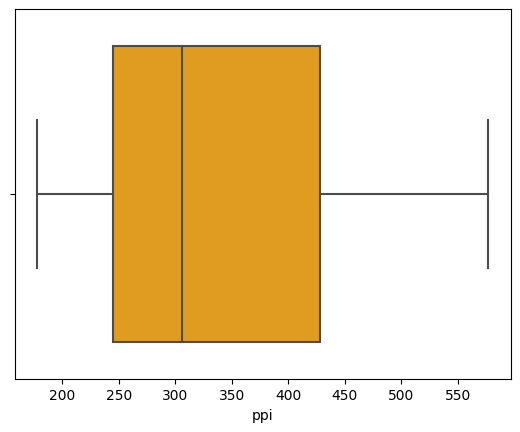

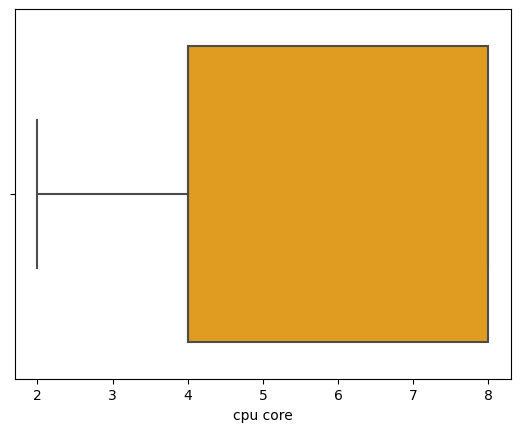

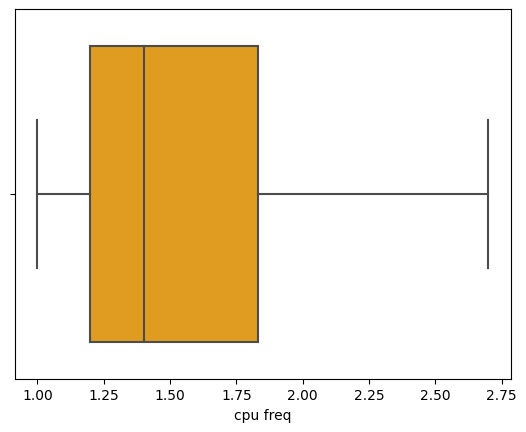

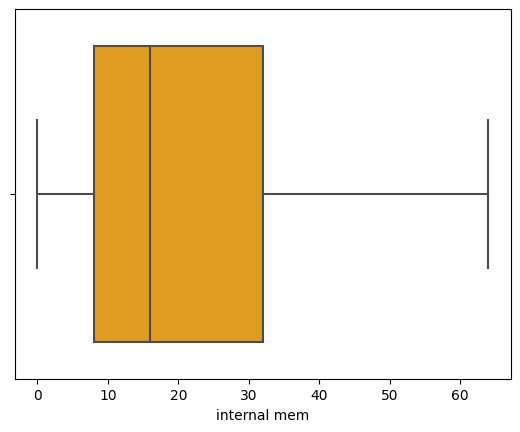

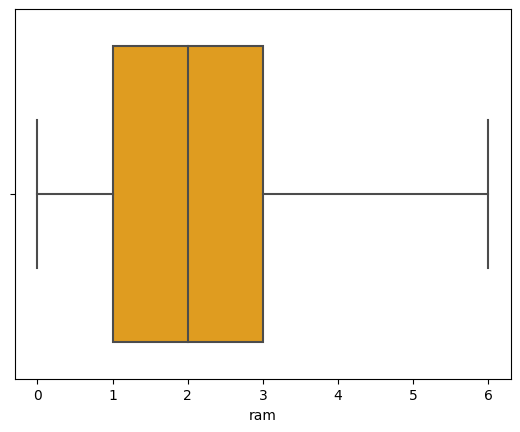

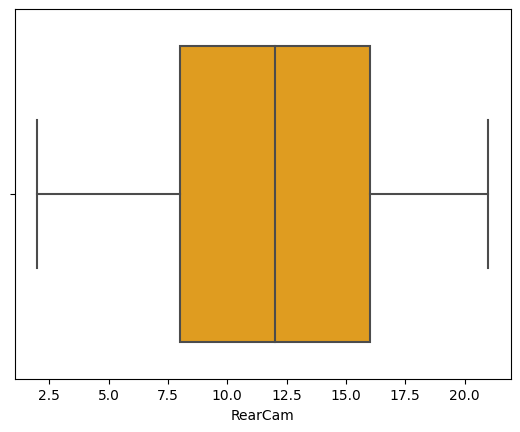

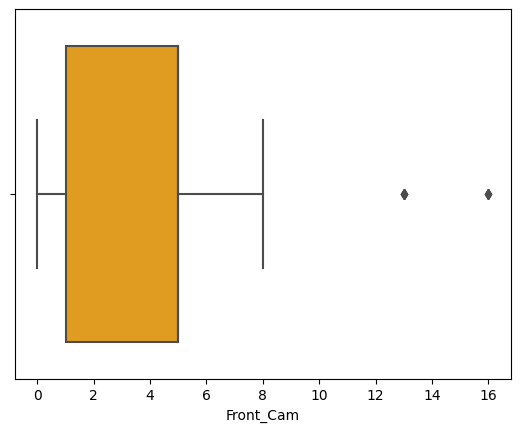

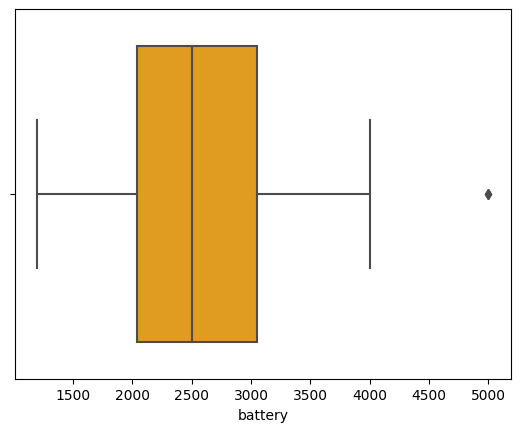

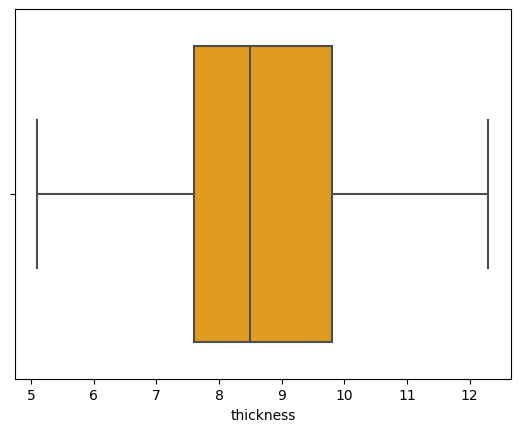

In [41]:

for i in data.columns:
    if data[i].dtype !="object":
        sns.boxplot(x=data[i],color='ORANGE')
        plt.show()

In [23]:
data.dropna(inplace=True)

## we can see that the outlier are treated.

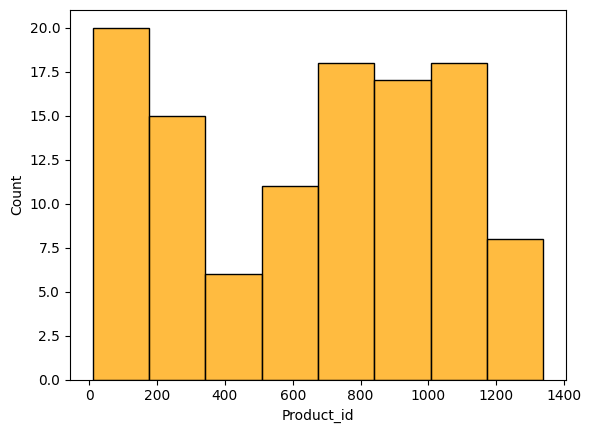

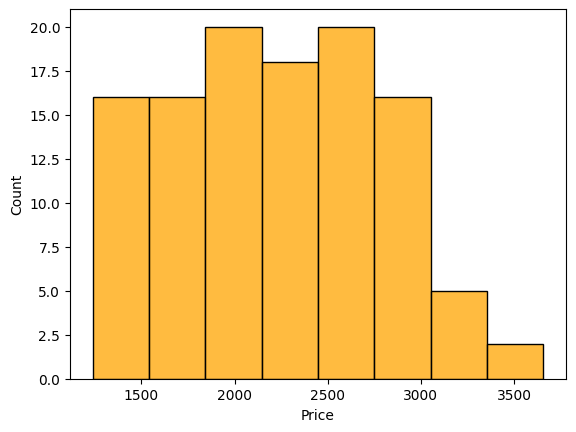

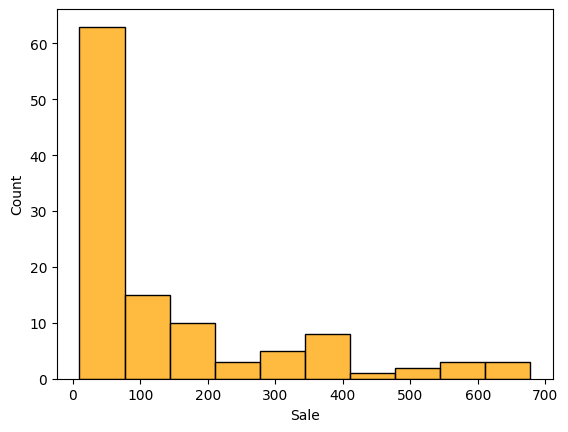

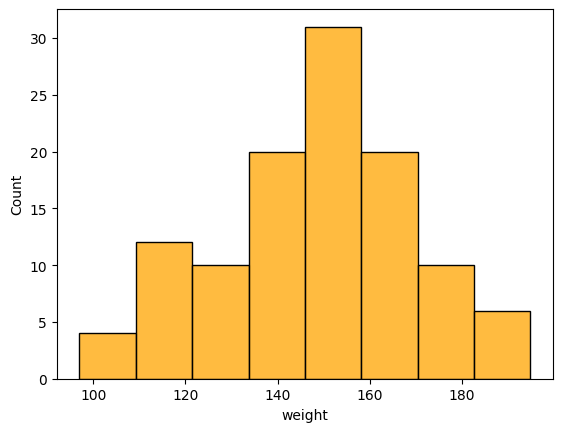

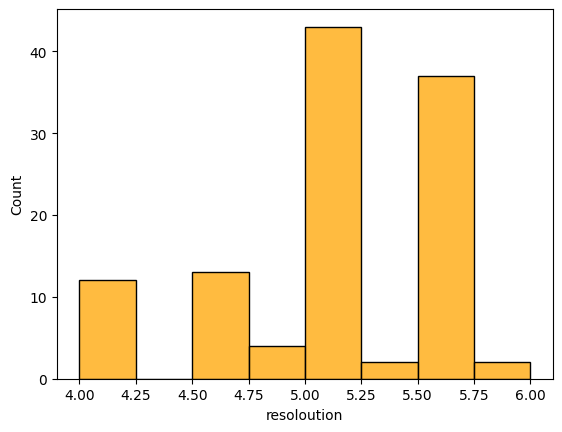

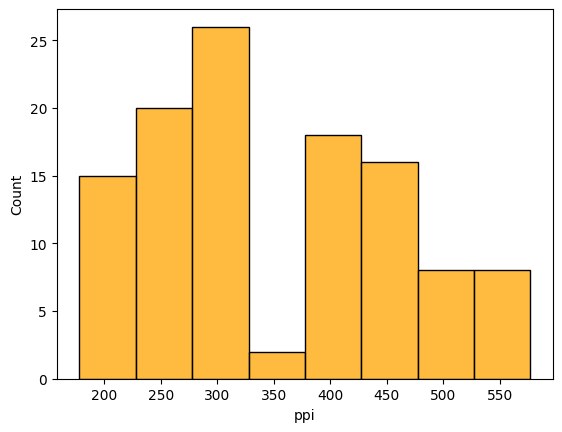

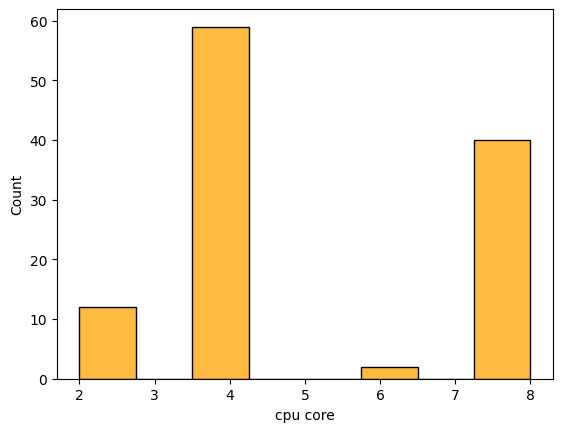

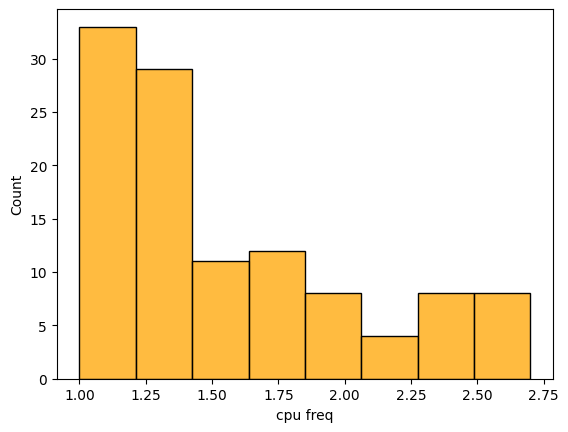

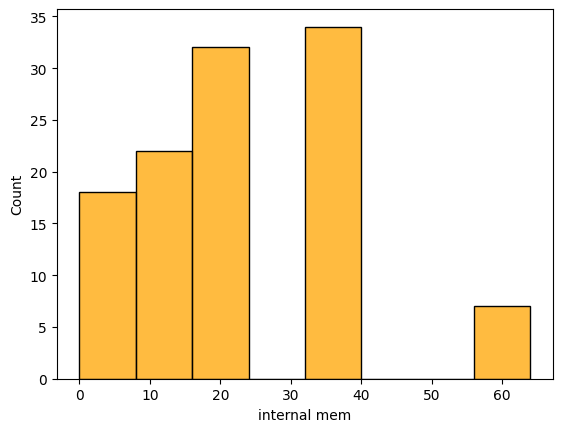

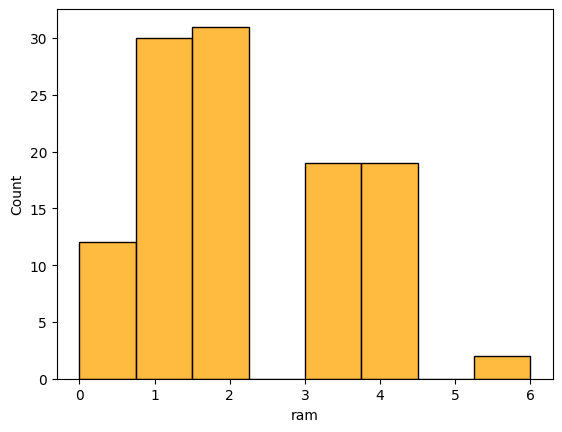

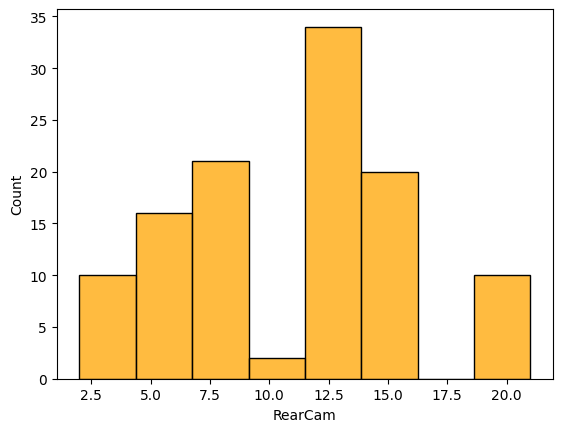

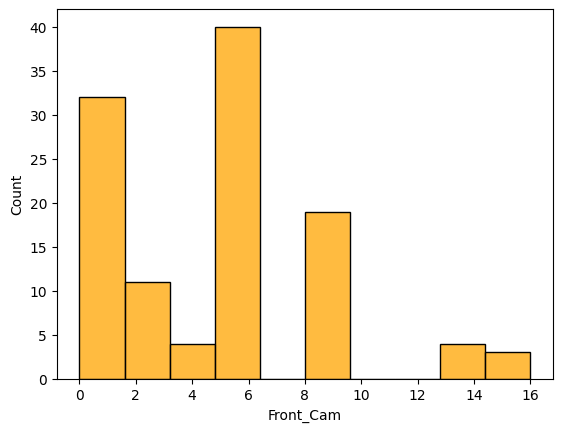

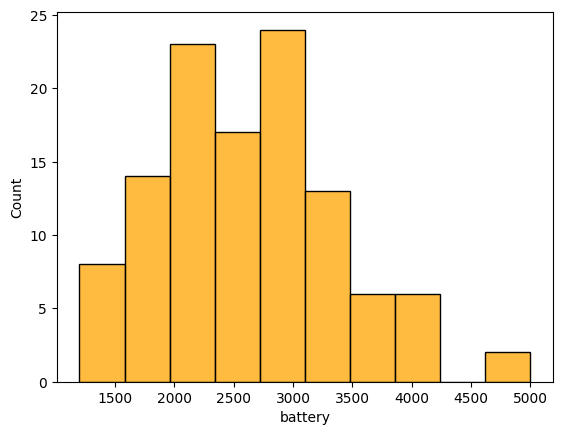

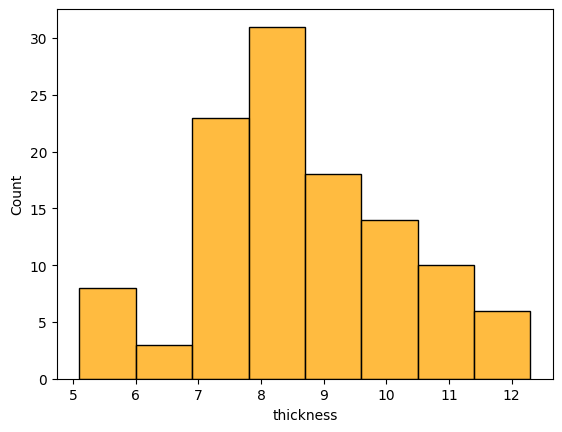

In [40]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.histplot(x=data[i],color="ORANGE")
        plt.show()

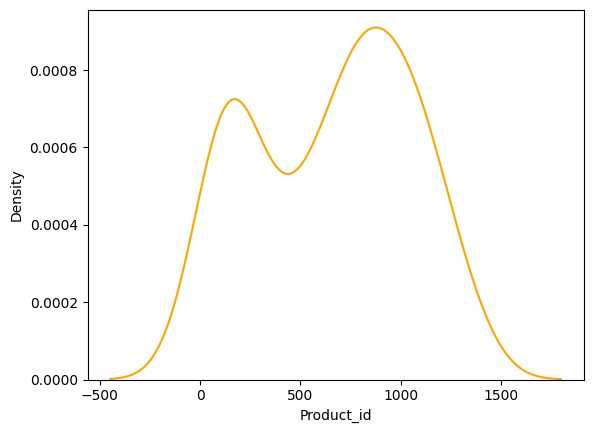

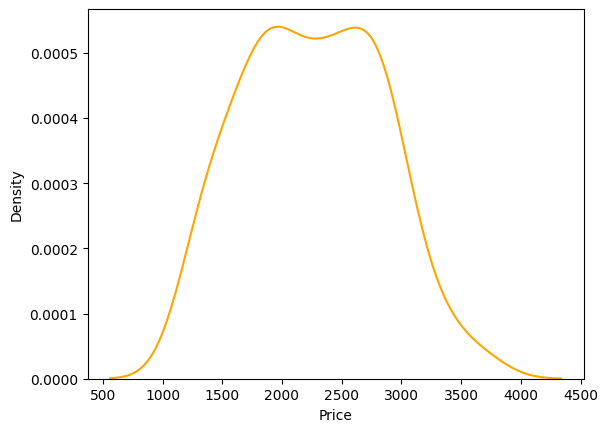

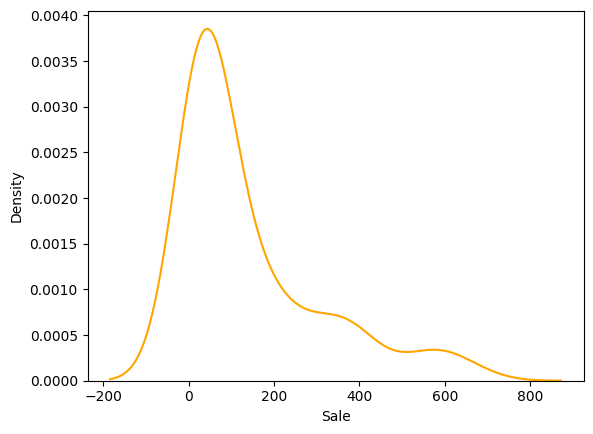

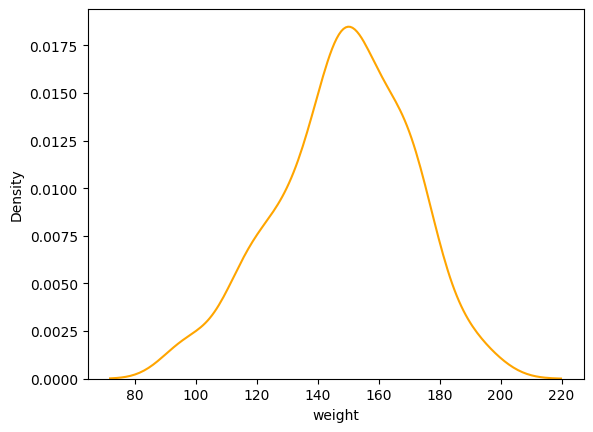

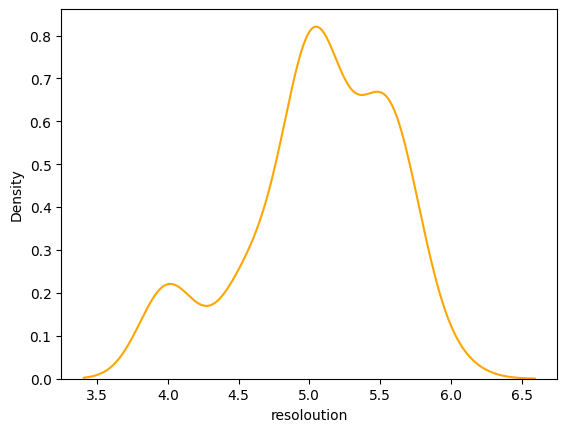

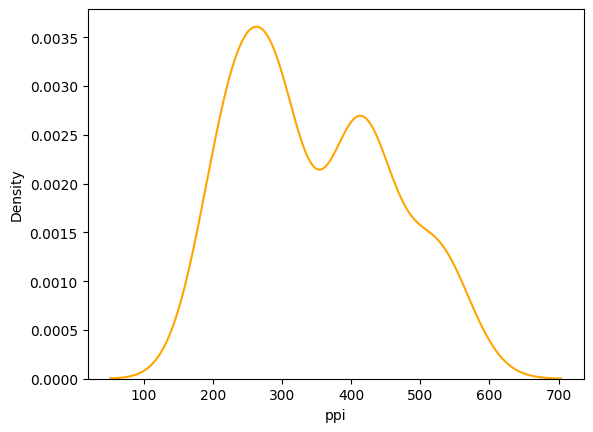

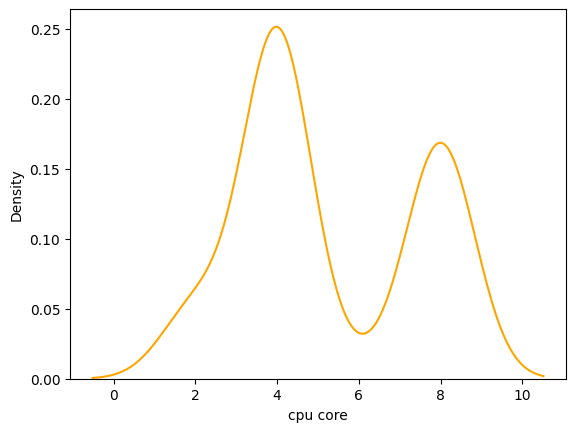

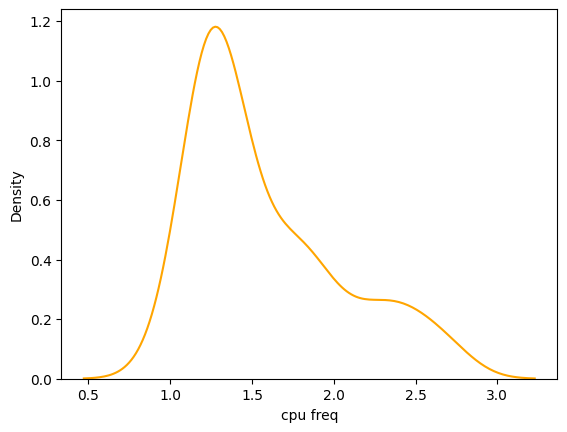

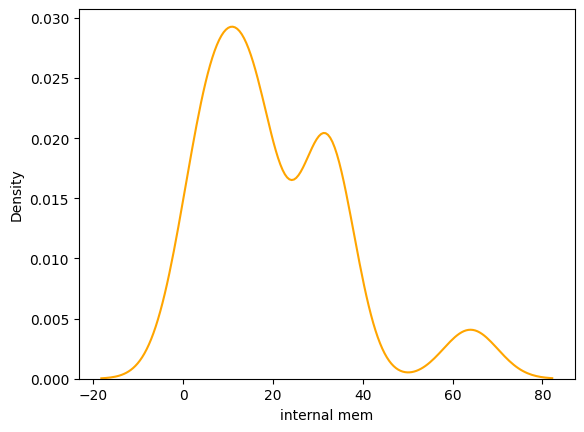

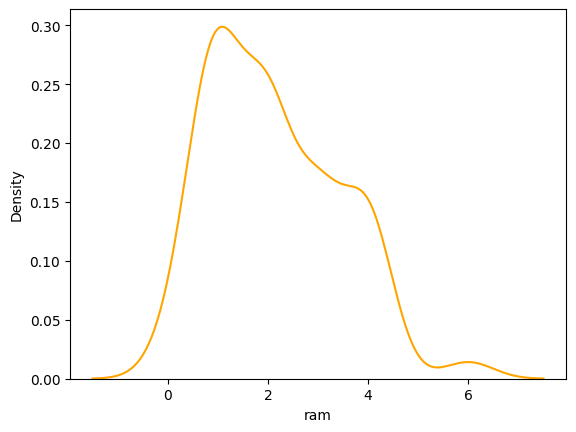

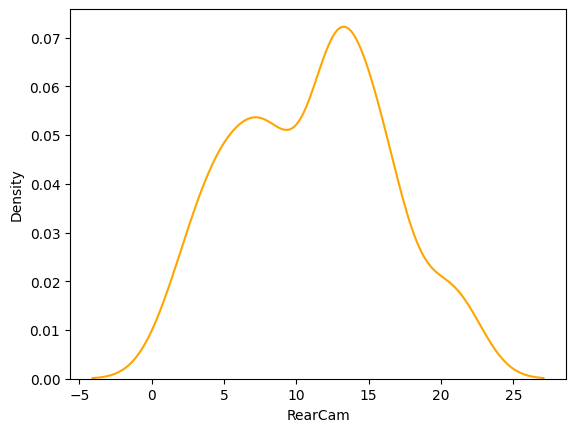

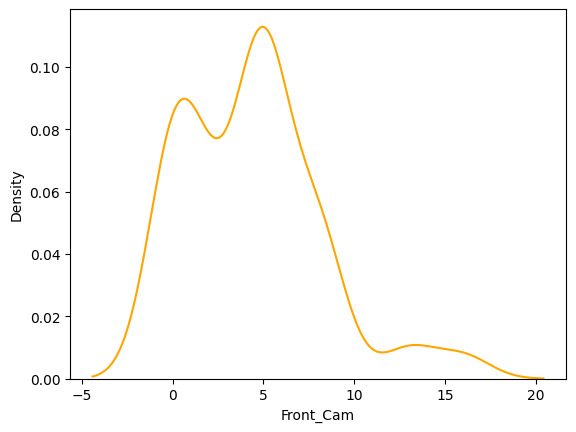

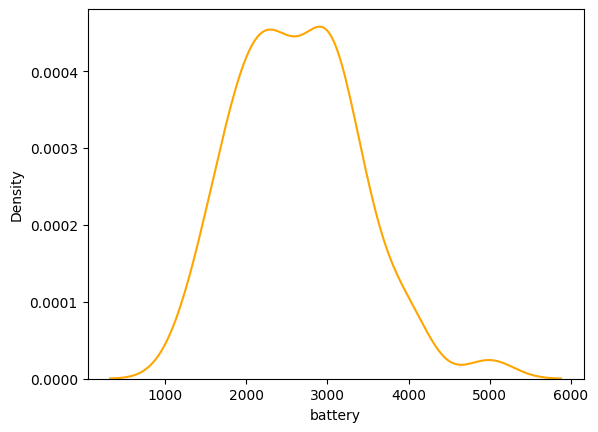

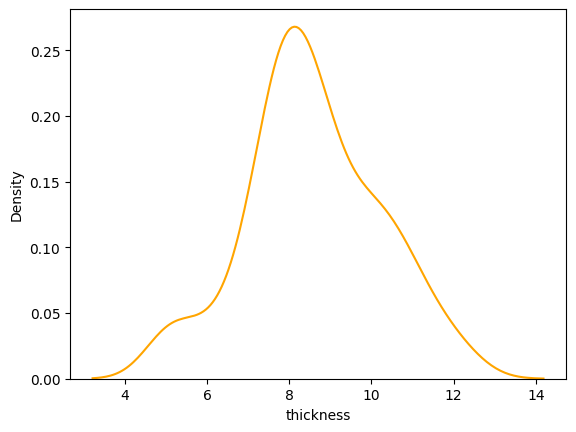

In [48]:

for i in data.columns:
    if data[i].dtypes !="object":
        sns.kdeplot(x=data[i],color='orange')
        plt.show()

## violinplot

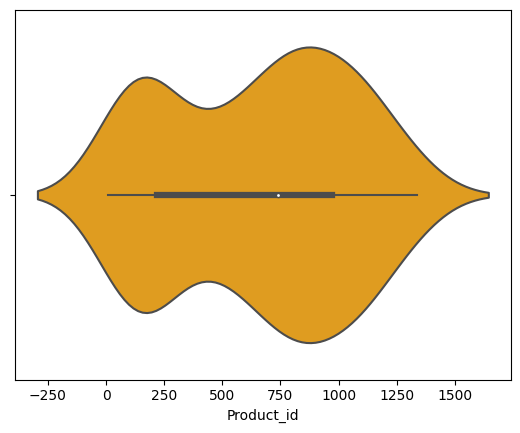

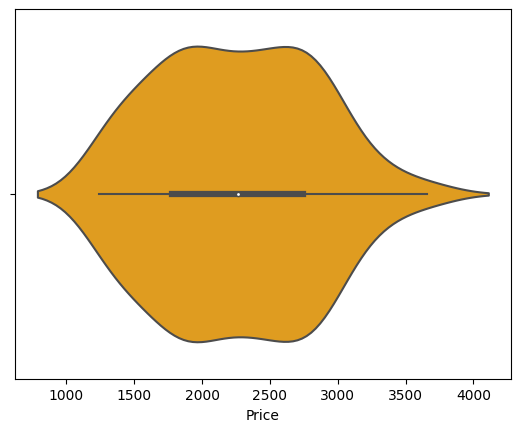

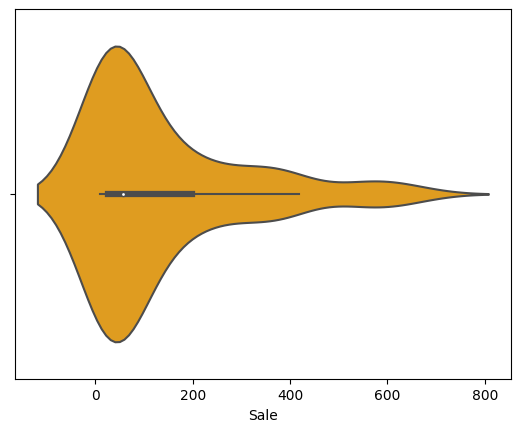

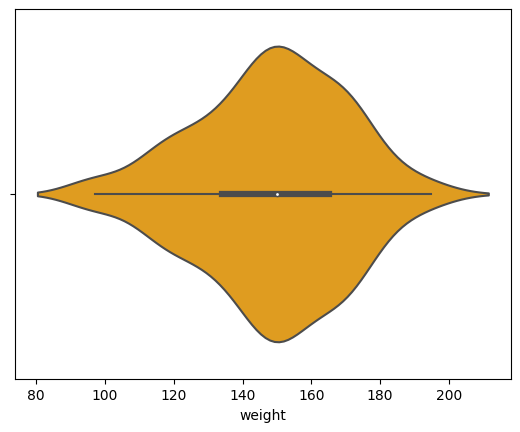

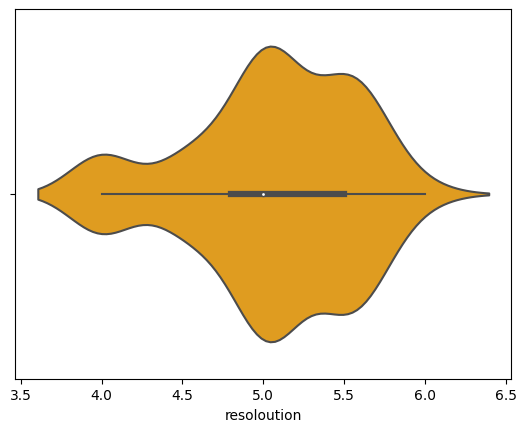

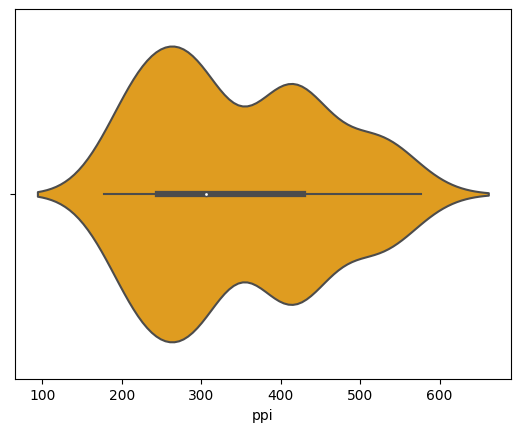

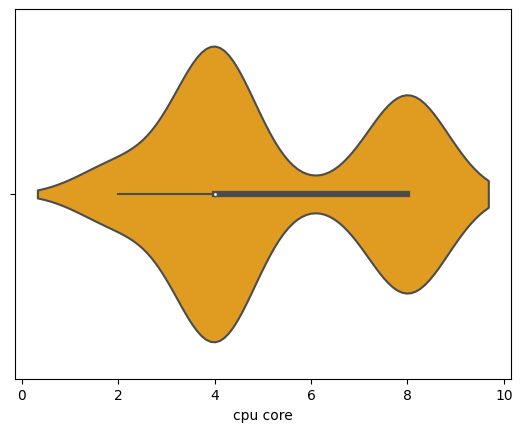

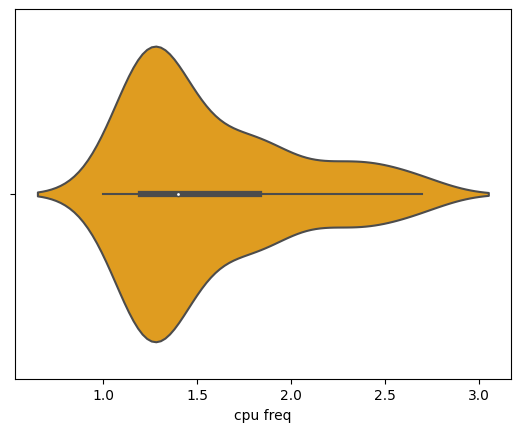

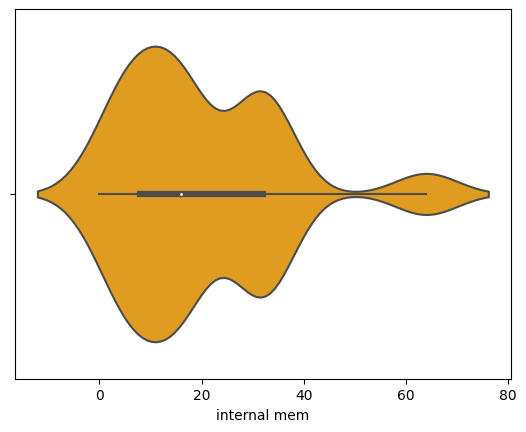

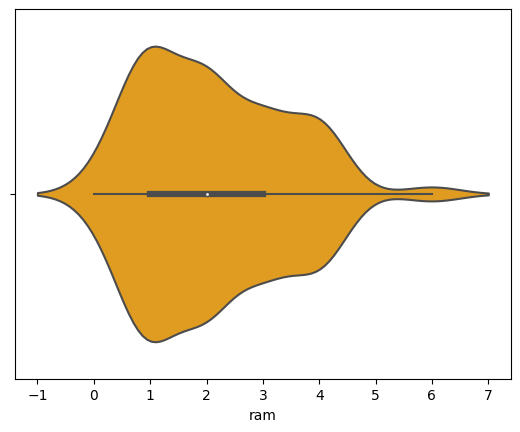

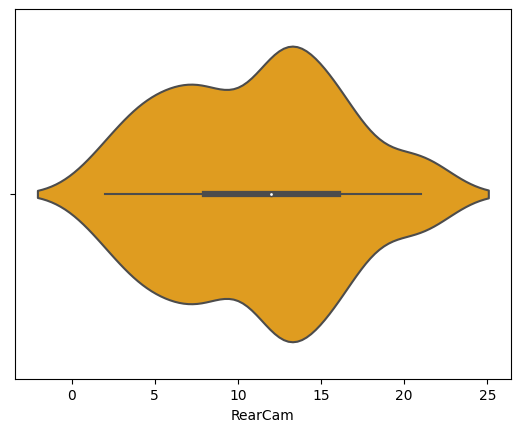

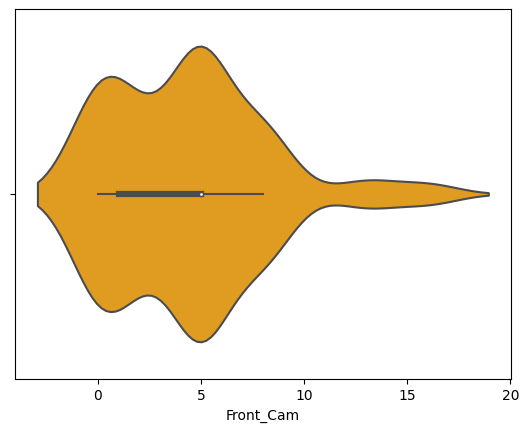

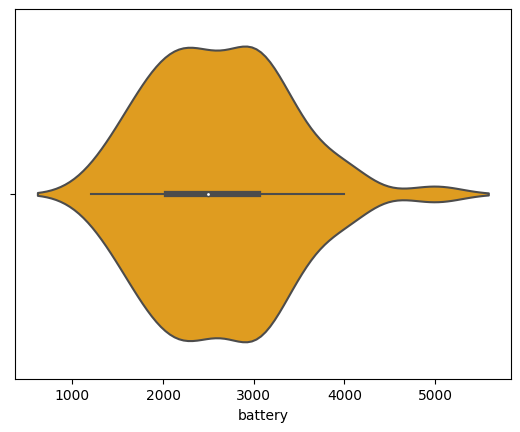

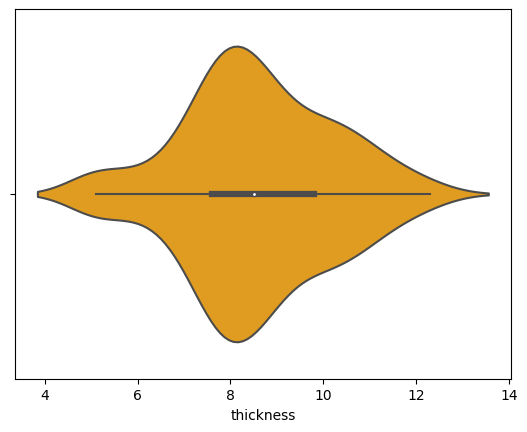

In [49]:
for i in data.columns:
    if data[i].dtypes !="object":
        sns.violinplot(x=data[i],color="orange")
        plt.show()

### Correlation between independent variable and depended variable

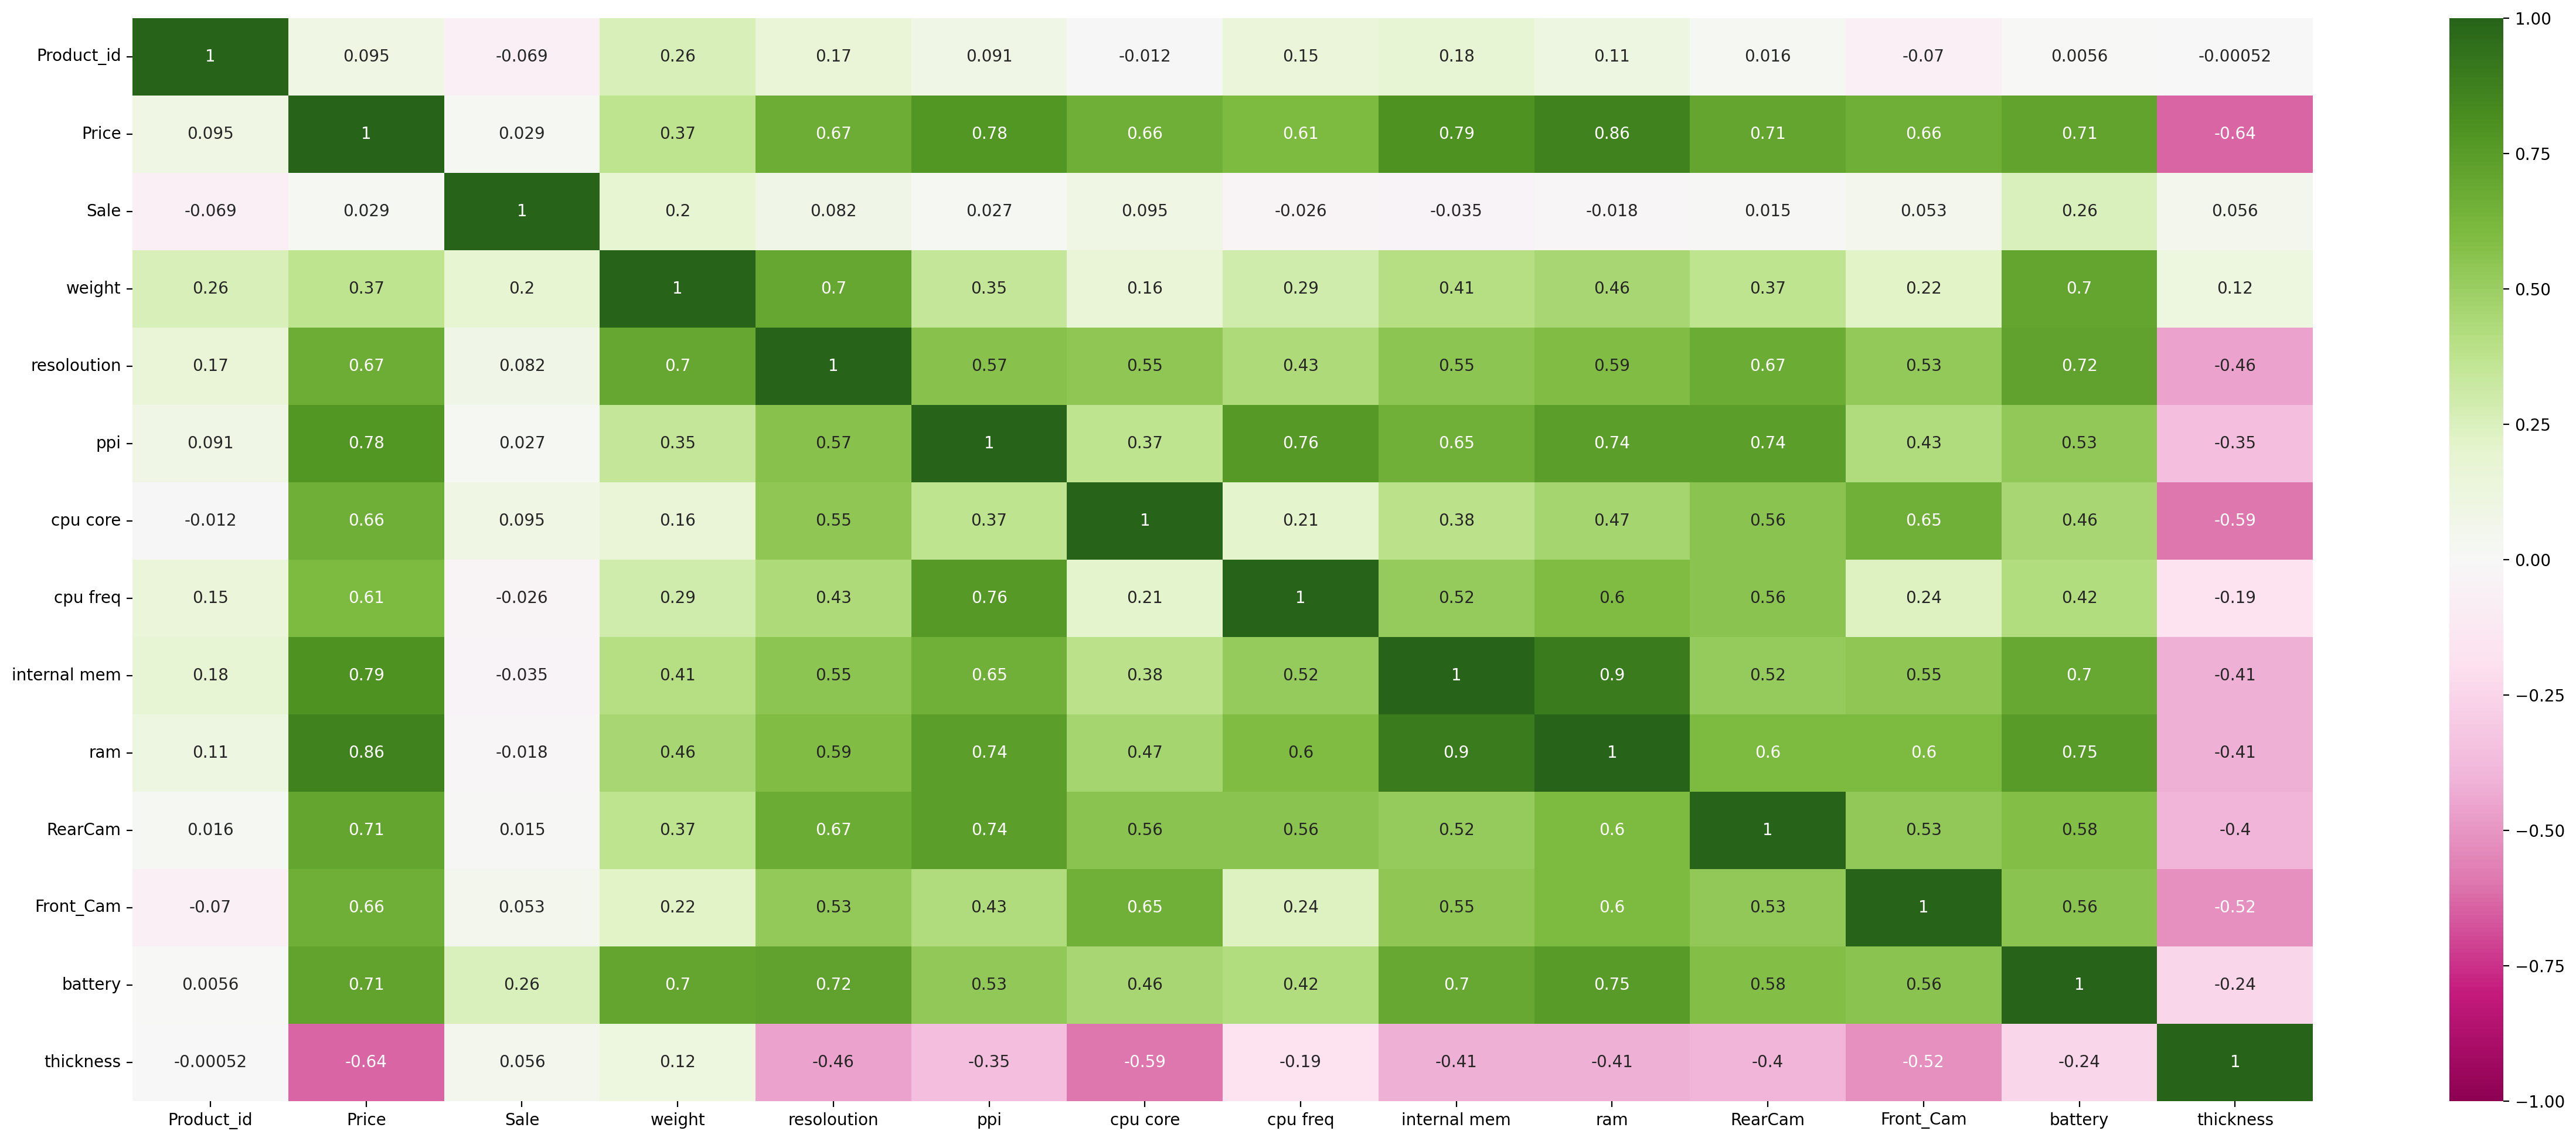

In [38]:
plt.figure(figsize = (30,12), dpi = 200)
sns.heatmap(data.corr(), annot = True, vmin = -1, vmax = +1, cmap = "PiYG")
plt.show()

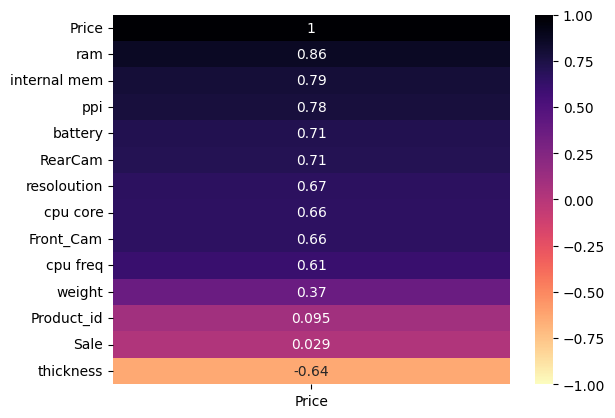

In [27]:
sns.heatmap(data.corr()[['Price']].sort_values(by='Price',ascending = False),vmin=-1,vmax=1, annot=True,cmap="magma_r");

### Lets take only the columns with good correleation with the target


In [28]:
x = data[['ram','battery','internal mem','Price']].values
y = data[['Price']].values

## Feature scaling

In [29]:
rs = RobustScaler()

In [30]:
x= rs.fit_transform(x)

# <i><center>Model building & Crossvalidation


In [31]:
models= {
    "LinearRegression":LinearRegression(),
    "Ridge":Ridge(),
    "LinearSVR":LinearSVR(),
    "DecisionTreeRegressor":DecisionTreeRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "RandomForestRegressor":RandomForestRegressor()
}
for name, model in models.items():
    scores = cross_val_score(model, x,y, scoring="neg_mean_squared_error",cv=10,n_jobs=-1)
    print("cross validation model : {}".format(name))
    rmse = np.sqrt(-scores)
    rmse_average = np.mean(rmse)
    print("AVERAGE RMSE: ",rmse_average)
    print("*"*100)

cross validation model : LinearRegression
AVERAGE RMSE:  4.040416224351e-13
****************************************************************************************************
cross validation model : Ridge
AVERAGE RMSE:  28.723001258955613
****************************************************************************************************
cross validation model : LinearSVR
AVERAGE RMSE:  2218.6317028181643
****************************************************************************************************
cross validation model : DecisionTreeRegressor
AVERAGE RMSE:  53.93174897468033
****************************************************************************************************
cross validation model : GradientBoostingRegressor
AVERAGE RMSE:  33.84849920953572
****************************************************************************************************
cross validation model : AdaBoostRegressor
AVERAGE RMSE:  54.97270314128325
*********************************************

### We may proceed with ridge regressor as it is having the least RMSE

In [32]:
model =GradientBoostingRegressor()

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [34]:
model.fit(x_train, y_train)
y_pred = model.predict(x)
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTION"), dtype=float)
OUTPUT.head()

,ACTUAL,PREDICTION
0,2357.0,2357.307055
1,1749.0,1748.903089
2,1916.0,1941.820456
3,1315.0,1315.063696
4,1749.0,1748.903089


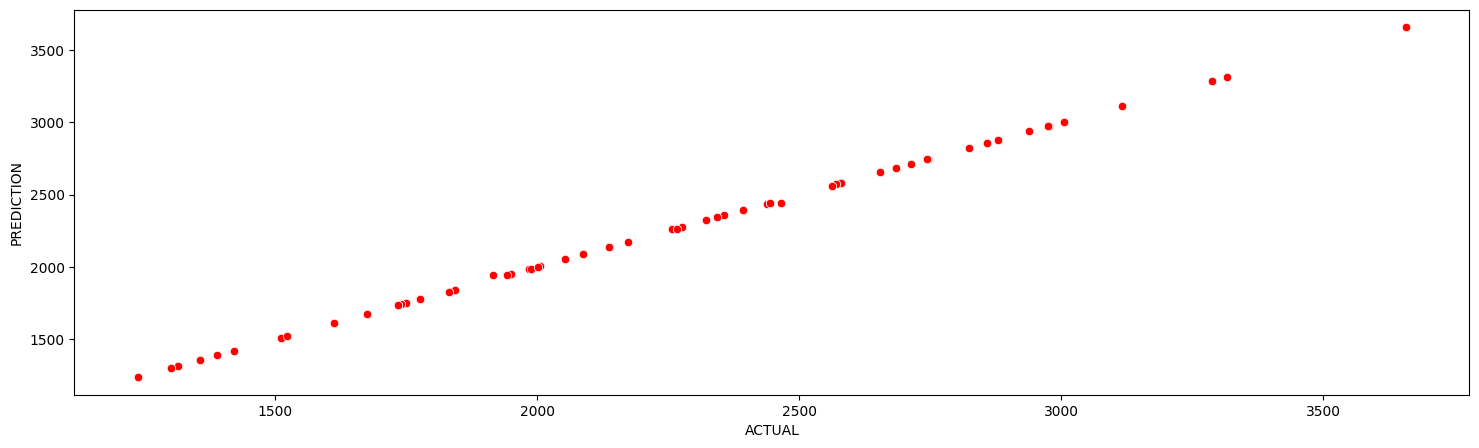

In [67]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=OUTPUT, x="ACTUAL", y="PREDICTION",color='red');

In [36]:
model.score(x,y)

0.9999554656926037